# Sentiment Analysis

## Data Analysis 

### Load data

In [17]:
#reading of dataframe using pandas by read_csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("datasets/TA_restaurants_curated.csv")

In [18]:
#Printing first 5 columns from our data frame
df = data.loc[data['City'] == 'Athens']
df.head()

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
3434,0,Simul Gastronomic Situ,Athens,"['European', 'Vegetarian Friendly', 'Vegan Opt...",1.0,5.0,$$ - $$$,127.0,"[['Excellent experience', 'A nice surprise'], ...",/Restaurant_Review-g189400-d9763282-Reviews-Si...,d9763282
3435,1,Cinque Wine & Deli Bar,Athens,"['Wine Bar', 'Greek', 'Delicatessen', 'Gluten ...",2.0,5.0,$,1013.0,[['One of the best restaurants we ever visite....,/Restaurant_Review-g189400-d9462540-Reviews-Ci...,d9462540
3436,2,Dinner in the Sky,Athens,"['Mediterranean', 'European', 'Greek', 'Vegeta...",3.0,5.0,$$$$,886.0,"[['Great sensorial experience', 'Perfect Way t...",/Restaurant_Review-g189400-d7825999-Reviews-Di...,d7825999
3437,3,Aleria,Athens,"['Greek', 'Mediterranean', 'European', 'Vegeta...",4.0,5.0,$$$$,934.0,"[['Surprise Find!', 'Fabulous evening'], ['01/...",/Restaurant_Review-g189400-d799575-Reviews-Ale...,d799575
3438,4,Feyrouz,Athens,"['Lebanese', 'Fast Food', 'Mediterranean', 'Mi...",5.0,5.0,$,282.0,"[['A hidden gem in Athens', 'Not just great - ...",/Restaurant_Review-g189400-d6784810-Reviews-Fe...,d6784810


In [19]:
#Observing the lables of each column
print(df.keys())

Index(['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')


In [20]:
#Observing the shape of our data frame.
df.shape
# Note: We have 11 features and 125527 data points.

(1938, 11)

In [21]:
#Lets check for missing values
df.info()
#Observe that there are some missing values in 'Cuisine Style', 'Ranking', 'Rating',
#'Price Range','Numver of Reviews' &'Reviews' column.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 3434 to 5371
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1938 non-null   int64  
 1   Name               1938 non-null   object 
 2   City               1938 non-null   object 
 3   Cuisine Style      1536 non-null   object 
 4   Ranking            1787 non-null   float64
 5   Rating             1788 non-null   float64
 6   Price Range        1262 non-null   object 
 7   Number of Reviews  1643 non-null   float64
 8   Reviews            1789 non-null   object 
 9   URL_TA             1938 non-null   object 
 10  ID_TA              1938 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 181.7+ KB


In [22]:
df.describe()
#Observe that more than 75% of our data is belonging to positive /
#class, i.e. we have imbalanced dataset.

,Unnamed: 0,Ranking,Rating,Number of Reviews
count,1938.00000,1787.000000,1788.000000,1643.000000
mean,968.50000,894.621712,4.207774,101.603774
std,559.59673,516.414318,0.611200,279.433629
min,0.00000,1.000000,-1.000000,2.000000
25%,484.25000,447.500000,4.000000,7.000000
50%,968.50000,895.000000,4.500000,21.000000
75%,1452.75000,1341.500000,4.500000,74.000000
max,1937.00000,1788.000000,5.000000,4234.000000


In [23]:
#Lets do the value count on 'Rating'.
df.Rating.value_counts()

 4.5    661
 4.0    526
 5.0    289
 3.5    204
 3.0     70
 2.5     16
 2.0     15
 1.0      4
 1.5      2
-1.0      1
Name: Rating, dtype: int64

### Exploratory Data Analysis

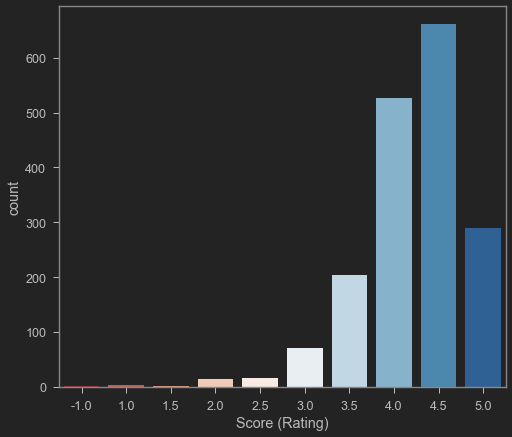

In [24]:
#Importing Seaborn and Matplotlib for graphical effects.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x='Rating', data=df, palette='RdBu')
plt.xlabel('Score (Rating)')
plt.show()

### Creating a new dataframe

In [25]:
#copying the original dataframe to 'temp_df'.
temp_df = df[['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA']]
#Adding new features to dataframe.
temp_df["Sentiment"] = temp_df["Rating"].apply(lambda score: "positive" if score > 3 else ("negative" if score < 3 else "not defined"))
#temp_df["Usefulness"] = (temp_df["HelpfulnessNumerator"]/temp_df["HelpfulnessDenominator"]).apply\
#(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and\
                                                                       # n <= 0.75 else "useless")))

#temp_df.loc[temp_df.HelpfulnessDenominator == 0, 'Usefulness'] = ["useless"]
# Removing all rows where 'Rating' is equal to 3
temp_df = temp_df[temp_df.Rating != 3]
#Lets now observe the shape of our new dataframe.
temp_df.shape

(1868, 12)

In [26]:
temp_df.describe()

,Unnamed: 0,Ranking,Rating,Number of Reviews
count,1868.000000,1717.000000,1718.000000,1592.000000
mean,942.276767,862.998835,4.256985,103.643216
std,552.905462,501.866824,0.571754,283.404599
min,0.000000,1.000000,-1.000000,2.000000
25%,466.750000,430.000000,4.000000,7.000000
50%,933.500000,860.000000,4.500000,21.000000
75%,1401.250000,1289.000000,4.500000,76.250000
max,1937.000000,1788.000000,5.000000,4234.000000


In [27]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1868 entries, 3434 to 5371
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1868 non-null   int64  
 1   Name               1868 non-null   object 
 2   City               1868 non-null   object 
 3   Cuisine Style      1496 non-null   object 
 4   Ranking            1717 non-null   float64
 5   Rating             1718 non-null   float64
 6   Price Range        1234 non-null   object 
 7   Number of Reviews  1592 non-null   float64
 8   Reviews            1719 non-null   object 
 9   URL_TA             1868 non-null   object 
 10  ID_TA              1868 non-null   object 
 11  Sentiment          1868 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 189.7+ KB


In [28]:
#Lets view the dataframe when Rating=5
temp_df[temp_df.Rating == 5].head(10)

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Sentiment
3434,0,Simul Gastronomic Situ,Athens,"['European', 'Vegetarian Friendly', 'Vegan Opt...",1.0,5.0,$$ - $$$,127.0,"[['Excellent experience', 'A nice surprise'], ...",/Restaurant_Review-g189400-d9763282-Reviews-Si...,d9763282,positive
3435,1,Cinque Wine & Deli Bar,Athens,"['Wine Bar', 'Greek', 'Delicatessen', 'Gluten ...",2.0,5.0,$,1013.0,[['One of the best restaurants we ever visite....,/Restaurant_Review-g189400-d9462540-Reviews-Ci...,d9462540,positive
3436,2,Dinner in the Sky,Athens,"['Mediterranean', 'European', 'Greek', 'Vegeta...",3.0,5.0,$$$$,886.0,"[['Great sensorial experience', 'Perfect Way t...",/Restaurant_Review-g189400-d7825999-Reviews-Di...,d7825999,positive
3437,3,Aleria,Athens,"['Greek', 'Mediterranean', 'European', 'Vegeta...",4.0,5.0,$$$$,934.0,"[['Surprise Find!', 'Fabulous evening'], ['01/...",/Restaurant_Review-g189400-d799575-Reviews-Ale...,d799575,positive
3438,4,Feyrouz,Athens,"['Lebanese', 'Fast Food', 'Mediterranean', 'Mi...",5.0,5.0,$,282.0,"[['A hidden gem in Athens', 'Not just great - ...",/Restaurant_Review-g189400-d6784810-Reviews-Fe...,d6784810,positive
3439,5,Funky Gourmet,Athens,"['Mediterranean', 'European', 'Greek', 'Contem...",6.0,5.0,$$$$,1046.0,"[['Anniversary Dinner', 'Puerto Rico meets the...",/Restaurant_Review-g189400-d2168139-Reviews-Fu...,d2168139,positive
3440,6,A Little Taste of Home,Athens,"['Turkish', 'Mediterranean', 'European', 'Gree...",7.0,5.0,$$ - $$$,317.0,"[['Best Restaurant in Athens', 'New years Eve ...",/Restaurant_Review-g189400-d10559098-Reviews-A...,d10559098,positive
3479,45,Spiti Mas,Athens,"['Cafe', 'Mediterranean', 'European', 'Greek',...",46.0,5.0,$,135.0,"[['Nice but small', 'Start your morning here!'...",/Restaurant_Review-g189400-d10529343-Reviews-S...,d10529343,positive
3525,91,CTC,Athens,"['Mediterranean', 'European', 'Greek', 'Seafoo...",92.0,5.0,$$$$,135.0,"[['Alex the genius', 'Simply excellent'], ['11...",/Restaurant_Review-g189400-d8141254-Reviews-CT...,d8141254,positive
3555,121,ta5f Taverna,Athens,"['Mediterranean', 'Greek', 'Vegetarian Friendl...",122.0,5.0,$,131.0,"[['This place is a gem!', 'Like Eating with Fa...",/Restaurant_Review-g189400-d5312490-Reviews-Ta...,d5312490,positive


### Positive reviews are very common

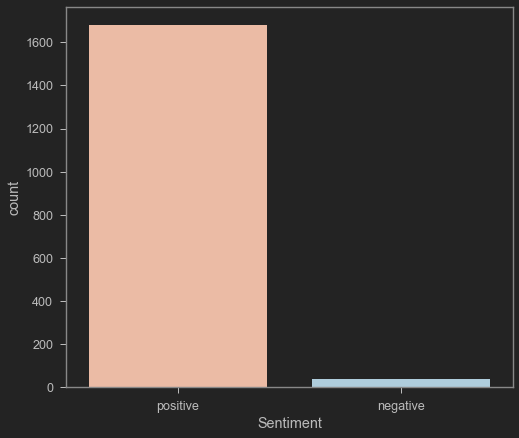

In [29]:
sns.countplot(x='Sentiment', order=["positive", "negative"], data=temp_df, palette='RdBu')
plt.xlabel('Sentiment')
plt.show()

In [30]:
temp_df.Sentiment.value_counts()

positive       1680
not defined     150
negative         38
Name: Sentiment, dtype: int64

Therefore we could conclude that the positive reviews are way more than the negative reviews.

### Polpular words in Review

In [31]:
pos = temp_df.loc[temp_df['Sentiment'] == 'positive']
pos = pos[0:25000]


neg = temp_df.loc[temp_df['Sentiment'] == 'negative']
neg = neg[0:25000]

In [32]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt


def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["Reviews"]:
        text = str(val).lower()
        #text = text.translate(trantab)
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

In [33]:
# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='w', bbox_inches='tight')

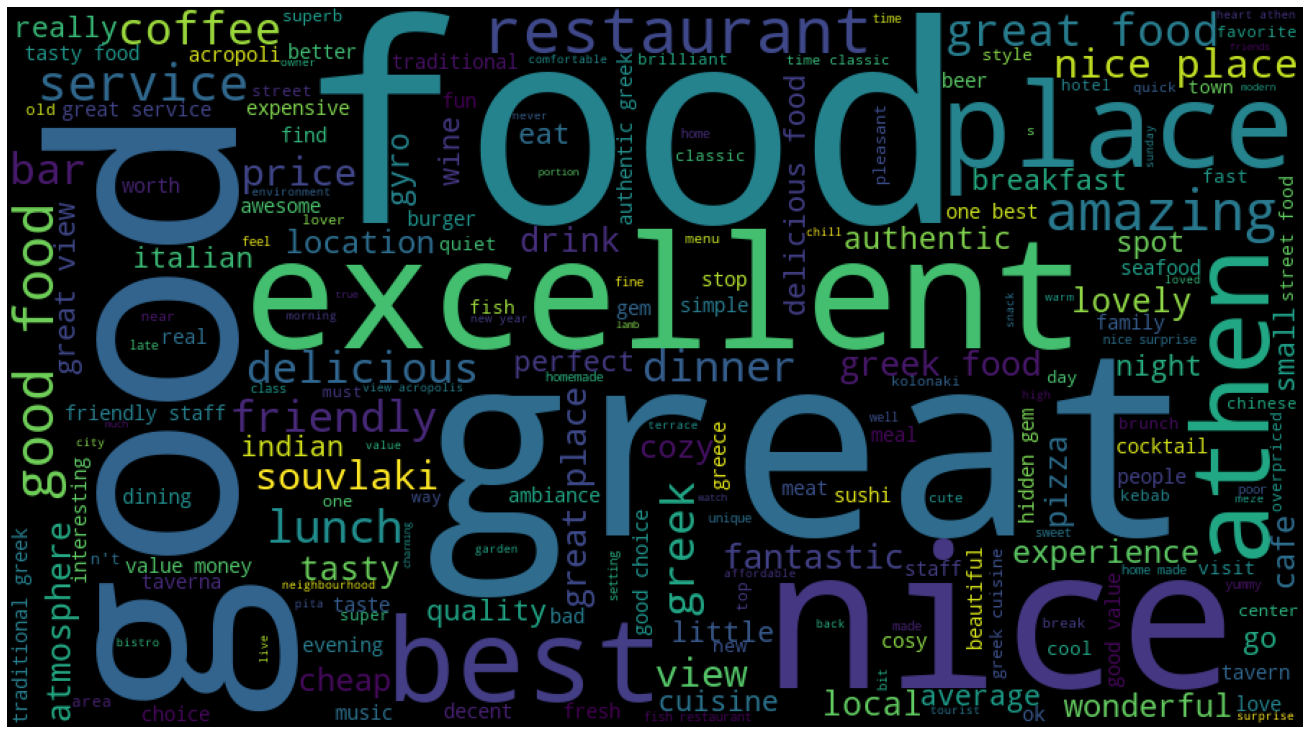

<Figure size 576x504 with 0 Axes>

In [34]:
#Visuallizing popular positive words
plot_Cloud(pos_wordcloud)

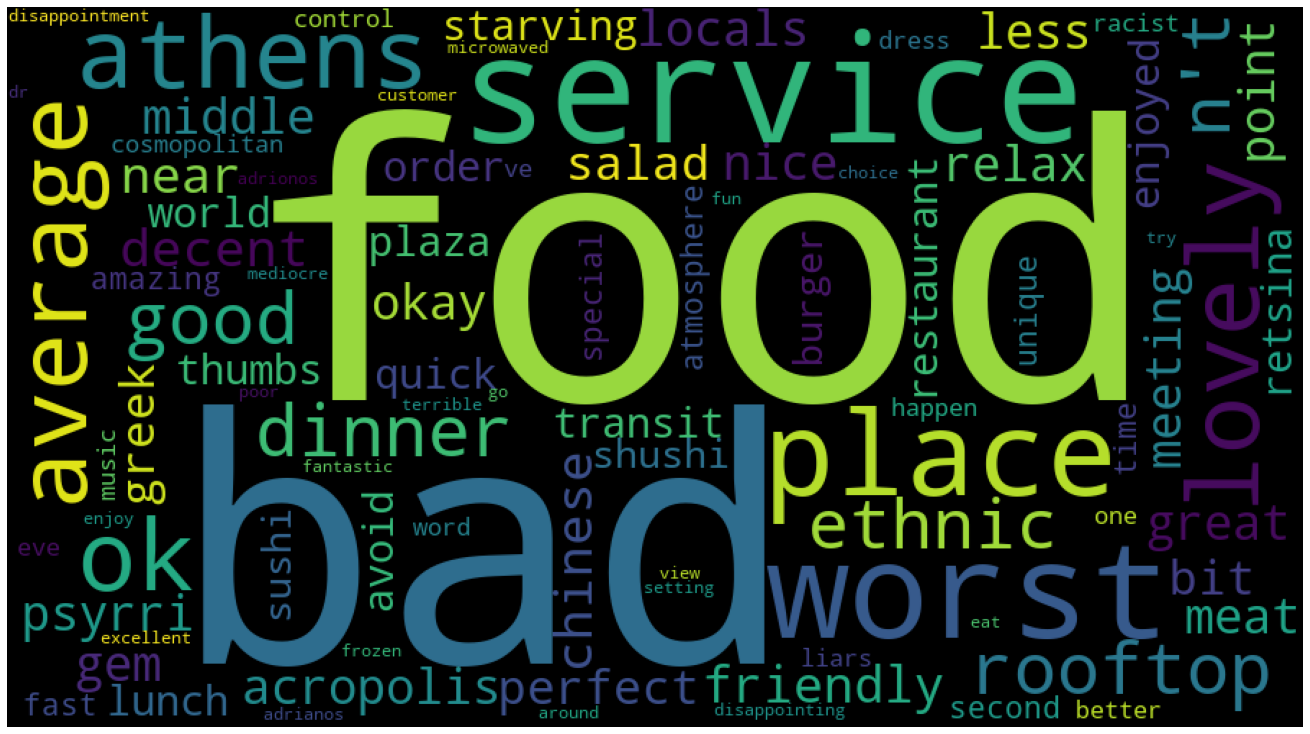

<Figure size 576x504 with 0 Axes>

In [35]:
#Visuallizing popular negative words
plot_Cloud(neg_wordcloud)

## Sentiment Analysis 

In [36]:
# keep only the rows with City as Athens
data = data.loc[data['City'] == 'Athens']
data

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
3434,0,Simul Gastronomic Situ,Athens,"['European', 'Vegetarian Friendly', 'Vegan Opt...",1.0,5.0,$$ - $$$,127.0,"[['Excellent experience', 'A nice surprise'], ...",/Restaurant_Review-g189400-d9763282-Reviews-Si...,d9763282
3435,1,Cinque Wine & Deli Bar,Athens,"['Wine Bar', 'Greek', 'Delicatessen', 'Gluten ...",2.0,5.0,$,1013.0,[['One of the best restaurants we ever visite....,/Restaurant_Review-g189400-d9462540-Reviews-Ci...,d9462540
3436,2,Dinner in the Sky,Athens,"['Mediterranean', 'European', 'Greek', 'Vegeta...",3.0,5.0,$$$$,886.0,"[['Great sensorial experience', 'Perfect Way t...",/Restaurant_Review-g189400-d7825999-Reviews-Di...,d7825999
3437,3,Aleria,Athens,"['Greek', 'Mediterranean', 'European', 'Vegeta...",4.0,5.0,$$$$,934.0,"[['Surprise Find!', 'Fabulous evening'], ['01/...",/Restaurant_Review-g189400-d799575-Reviews-Ale...,d799575
3438,4,Feyrouz,Athens,"['Lebanese', 'Fast Food', 'Mediterranean', 'Mi...",5.0,5.0,$,282.0,"[['A hidden gem in Athens', 'Not just great - ...",/Restaurant_Review-g189400-d6784810-Reviews-Fe...,d6784810
...,...,...,...,...,...,...,...,...,...,...,...
5367,1933,Likovrisi Cafe & Restaurant,Athens,['Greek'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g189400-d13355098-Reviews-L...,d13355098
5368,1934,Doureios Ippos,Athens,['Greek'],NaN,NaN,$$ - $$$,NaN,NaN,/Restaurant_Review-g189400-d13355136-Reviews-D...,d13355136
5369,1935,Mikra Asia,Athens,['Mediterranean'],NaN,NaN,$,NaN,NaN,/Restaurant_Review-g189400-d13355222-Reviews-M...,d13355222
5370,1936,Sah,Athens,NaN,NaN,NaN,NaN,NaN,"[[], []]",/Restaurant_Review-g189400-d13355256-Reviews-S...,d13355256


In [37]:
# removing all the rows that contain Score = 3
data = data[data.Rating != 3]
data = data[data.Rating > 1]
data

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
3434,0,Simul Gastronomic Situ,Athens,"['European', 'Vegetarian Friendly', 'Vegan Opt...",1.0,5.0,$$ - $$$,127.0,"[['Excellent experience', 'A nice surprise'], ...",/Restaurant_Review-g189400-d9763282-Reviews-Si...,d9763282
3435,1,Cinque Wine & Deli Bar,Athens,"['Wine Bar', 'Greek', 'Delicatessen', 'Gluten ...",2.0,5.0,$,1013.0,[['One of the best restaurants we ever visite....,/Restaurant_Review-g189400-d9462540-Reviews-Ci...,d9462540
3436,2,Dinner in the Sky,Athens,"['Mediterranean', 'European', 'Greek', 'Vegeta...",3.0,5.0,$$$$,886.0,"[['Great sensorial experience', 'Perfect Way t...",/Restaurant_Review-g189400-d7825999-Reviews-Di...,d7825999
3437,3,Aleria,Athens,"['Greek', 'Mediterranean', 'European', 'Vegeta...",4.0,5.0,$$$$,934.0,"[['Surprise Find!', 'Fabulous evening'], ['01/...",/Restaurant_Review-g189400-d799575-Reviews-Ale...,d799575
3438,4,Feyrouz,Athens,"['Lebanese', 'Fast Food', 'Mediterranean', 'Mi...",5.0,5.0,$,282.0,"[['A hidden gem in Athens', 'Not just great - ...",/Restaurant_Review-g189400-d6784810-Reviews-Fe...,d6784810
...,...,...,...,...,...,...,...,...,...,...,...
5211,1777,O Petros,Athens,NaN,1779.0,2.0,NaN,4.0,"[[""Don't go there"", 'Poor service'], ['01/06/2...",/Restaurant_Review-g189400-d7680765-Reviews-O_...,d7680765
5212,1778,Elliniki Gonia Fast Food,Athens,NaN,1780.0,1.5,NaN,2.0,"[['a disappointment'], ['10/06/2015']]",/Restaurant_Review-g189400-d8696652-Reviews-El...,d8696652
5218,1784,Pide Pita,Athens,NaN,NaN,5.0,NaN,NaN,"[[], []]",/Restaurant_Review-g189400-d13336347-Reviews-P...,d13336347
5219,1785,Ath. Er,Athens,"['Cafe', 'European', 'Greek']",NaN,4.0,NaN,2.0,"[[], []]",/Restaurant_Review-g189400-d13336743-Reviews-A...,d13336743


In [38]:
# here we are going to set score = 1, 1.5, 2, 2.5 as negative ie 0
# and score = 3.5, 4, 4.5, 5 as positive ie 1
data.loc[(data.Rating == 1), 'Rating'] = 0
data.loc[(data.Rating == 1.5), 'Rating'] = 0
data.loc[(data.Rating == 2), 'Rating'] = 0
data.loc[(data.Rating == 2.5), 'Rating'] = 0
data.loc[(data.Rating == 3.5), 'Rating'] = 1
data.loc[(data.Rating == 4), 'Rating'] = 1
data.loc[(data.Rating == 4.5), 'Rating'] = 1
data.loc[(data.Rating == 5), 'Rating'] = 1

data

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
3434,0,Simul Gastronomic Situ,Athens,"['European', 'Vegetarian Friendly', 'Vegan Opt...",1.0,1.0,$$ - $$$,127.0,"[['Excellent experience', 'A nice surprise'], ...",/Restaurant_Review-g189400-d9763282-Reviews-Si...,d9763282
3435,1,Cinque Wine & Deli Bar,Athens,"['Wine Bar', 'Greek', 'Delicatessen', 'Gluten ...",2.0,1.0,$,1013.0,[['One of the best restaurants we ever visite....,/Restaurant_Review-g189400-d9462540-Reviews-Ci...,d9462540
3436,2,Dinner in the Sky,Athens,"['Mediterranean', 'European', 'Greek', 'Vegeta...",3.0,1.0,$$$$,886.0,"[['Great sensorial experience', 'Perfect Way t...",/Restaurant_Review-g189400-d7825999-Reviews-Di...,d7825999
3437,3,Aleria,Athens,"['Greek', 'Mediterranean', 'European', 'Vegeta...",4.0,1.0,$$$$,934.0,"[['Surprise Find!', 'Fabulous evening'], ['01/...",/Restaurant_Review-g189400-d799575-Reviews-Ale...,d799575
3438,4,Feyrouz,Athens,"['Lebanese', 'Fast Food', 'Mediterranean', 'Mi...",5.0,1.0,$,282.0,"[['A hidden gem in Athens', 'Not just great - ...",/Restaurant_Review-g189400-d6784810-Reviews-Fe...,d6784810
...,...,...,...,...,...,...,...,...,...,...,...
5211,1777,O Petros,Athens,NaN,1779.0,0.0,NaN,4.0,"[[""Don't go there"", 'Poor service'], ['01/06/2...",/Restaurant_Review-g189400-d7680765-Reviews-O_...,d7680765
5212,1778,Elliniki Gonia Fast Food,Athens,NaN,1780.0,0.0,NaN,2.0,"[['a disappointment'], ['10/06/2015']]",/Restaurant_Review-g189400-d8696652-Reviews-El...,d8696652
5218,1784,Pide Pita,Athens,NaN,NaN,1.0,NaN,NaN,"[[], []]",/Restaurant_Review-g189400-d13336347-Reviews-P...,d13336347
5219,1785,Ath. Er,Athens,"['Cafe', 'European', 'Greek']",NaN,1.0,NaN,2.0,"[[], []]",/Restaurant_Review-g189400-d13336743-Reviews-A...,d13336743


In [39]:
# To calculate no. of positive and negative reviews in the dataset
data.Rating.value_counts()

1.0    1680
0.0      33
Name: Rating, dtype: int64

In [40]:
#Dividing dataset to train and Test dataset
import math
totalsize=len(data)
 
# train_size=int(math.ceil(0.7*totalsize))

#training dataset
#train=data.head(totalsize)

#test dataset
#test=data.tail(totalsize)

#train.Rating.value_counts()

In [41]:
# dropping columns that are not necessary for visualization
data.drop(['URL_TA'], inplace=True, axis=1)
data.drop(['Cuisine Style'], inplace=True, axis=1)
data.drop(['Price Range'], inplace=True, axis=1)
data.drop(['Ranking'], inplace=True, axis=1)
data.drop(['Number of Reviews'], inplace=True, axis=1)
data.drop(['Name'], inplace=True, axis=1)

data.tail()

,Unnamed: 0,City,Rating,Reviews,ID_TA
5211,1777,Athens,0.0,"[[""Don't go there"", 'Poor service'], ['01/06/2...",d7680765
5212,1778,Athens,0.0,"[['a disappointment'], ['10/06/2015']]",d8696652
5218,1784,Athens,1.0,"[[], []]",d13336347
5219,1785,Athens,1.0,"[[], []]",d13336743
5220,1786,Athens,1.0,"[[""Best budget 'mezopoleio' in Psyrri (and pr....",d13343190


In [42]:
# converting all values of Reviews to list
data_reviews= data.Reviews.tolist()
data_reviews

["[['Excellent experience', 'A nice surprise'], ['01/09/2018', '01/01/2018']]",
 "[['One of the best restaurants we ever visite...', 'A truly delightful evening'], ['01/09/2018', '01/08/2018']]",
 "[['Great sensorial experience', 'Perfect Way to Watch the Sunset in Athens'], ['12/22/2017', '11/06/2017']]",
 "[['Surprise Find!', 'Fabulous evening'], ['01/08/2018', '01/06/2018']]",
 "[['A hidden gem in Athens', 'Not just great - this is awesome food.'], ['01/05/2018', '01/04/2018']]",
 "[['Anniversary Dinner', 'Puerto Rico meets the Brits in Funky Gourm...'], ['01/08/2018', '12/30/2017']]",
 "[['Best Restaurant in Athens', 'New years Eve dinners'], ['01/09/2018', '01/08/2018']]",
 "[['Great Restaurant', 'Outstanding good and service'], ['01/07/2018', '01/06/2018']]",
 "[['The best food experience', 'Cozy & tasy!!'], ['01/09/2018', '01/04/2018']]",
 "[['Dinner with Friends', 'Delicious food'], ['01/06/2018', '01/04/2018']]",
 "[['Traditional Greek food', 'Excellent'], ['01/02/2018', '01/0

## Preprocessing

**Cleaning of Reviews in data**

In [43]:
# making all the sentences to lower case
data_reviews = [element.lower() for element in data_reviews]
data_reviews

["[['excellent experience', 'a nice surprise'], ['01/09/2018', '01/01/2018']]",
 "[['one of the best restaurants we ever visite...', 'a truly delightful evening'], ['01/09/2018', '01/08/2018']]",
 "[['great sensorial experience', 'perfect way to watch the sunset in athens'], ['12/22/2017', '11/06/2017']]",
 "[['surprise find!', 'fabulous evening'], ['01/08/2018', '01/06/2018']]",
 "[['a hidden gem in athens', 'not just great - this is awesome food.'], ['01/05/2018', '01/04/2018']]",
 "[['anniversary dinner', 'puerto rico meets the brits in funky gourm...'], ['01/08/2018', '12/30/2017']]",
 "[['best restaurant in athens', 'new years eve dinners'], ['01/09/2018', '01/08/2018']]",
 "[['great restaurant', 'outstanding good and service'], ['01/07/2018', '01/06/2018']]",
 "[['the best food experience', 'cozy & tasy!!'], ['01/09/2018', '01/04/2018']]",
 "[['dinner with friends', 'delicious food'], ['01/06/2018', '01/04/2018']]",
 "[['traditional greek food', 'excellent'], ['01/02/2018', '01/0

In [44]:
#removal of all the html tags 
import re
def striphtml(data):
    p = re.compile(r'<.*?>') # here we have made a regular expression using 
    #compile function to remove html tags
    return p.sub('', data)# here it will be replaced by ''
for i in range(len(data_reviews)): #for every element of a train_reviews list it will run 
    data_reviews[i]=striphtml(data_reviews[i])
data_reviews

["[['excellent experience', 'a nice surprise'], ['01/09/2018', '01/01/2018']]",
 "[['one of the best restaurants we ever visite...', 'a truly delightful evening'], ['01/09/2018', '01/08/2018']]",
 "[['great sensorial experience', 'perfect way to watch the sunset in athens'], ['12/22/2017', '11/06/2017']]",
 "[['surprise find!', 'fabulous evening'], ['01/08/2018', '01/06/2018']]",
 "[['a hidden gem in athens', 'not just great - this is awesome food.'], ['01/05/2018', '01/04/2018']]",
 "[['anniversary dinner', 'puerto rico meets the brits in funky gourm...'], ['01/08/2018', '12/30/2017']]",
 "[['best restaurant in athens', 'new years eve dinners'], ['01/09/2018', '01/08/2018']]",
 "[['great restaurant', 'outstanding good and service'], ['01/07/2018', '01/06/2018']]",
 "[['the best food experience', 'cozy & tasy!!'], ['01/09/2018', '01/04/2018']]",
 "[['dinner with friends', 'delicious food'], ['01/06/2018', '01/04/2018']]",
 "[['traditional greek food', 'excellent'], ['01/02/2018', '01/0

In [45]:
#removal of all the special characters if present in text even numbers using regular expression
for i in range(len(data_reviews)):
    for k in data_reviews[i].split("\n"): # here we first split words of every sentence by using split 
        #command and split whereever we see space
        data_reviews[i]=(re.sub(r"[^a-zA-Z]+", ' ', k))# this is going to remove everything from 
        #which is not a letter ie a-z A-z
data_reviews

[' excellent experience a nice surprise ',
 ' one of the best restaurants we ever visite a truly delightful evening ',
 ' great sensorial experience perfect way to watch the sunset in athens ',
 ' surprise find fabulous evening ',
 ' a hidden gem in athens not just great this is awesome food ',
 ' anniversary dinner puerto rico meets the brits in funky gourm ',
 ' best restaurant in athens new years eve dinners ',
 ' great restaurant outstanding good and service ',
 ' the best food experience cozy tasy ',
 ' dinner with friends delicious food ',
 ' traditional greek food excellent ',
 ' jewish sephardi in athens kosher restaurant in athens ',
 ' good value delicious food excellent new year s eve dinner ',
 ' excellent restaurant great lunch ',
 ' very good food and atmosphere top restaurant in good old athens ',
 ' outstanding service excellent food and gr fantastic food and service ',
 ' best greek place in athens best lamb of my life very fast service k ',
 ' outstanding place at nig

In [46]:
#here we use nltk library to remove stopwords from reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#all the stopwords get stored in stop_words variable
stop_words=set(stopwords.words("english"))

for i in range(len(data_reviews)): #for every sentence in a list train_reviews it will run
    #breaking of sentence in to tokens ie words
    data_reviews_words=word_tokenize(data_reviews[i])
    s=""
    #for every word this for loop runs
    for w in data_reviews_words:
        #then we are checking if any stop word is present or not
        if w not in stop_words:
            #if not present it will be appended to sentence
            s=s+" "+w
         #here we will get a sentence without stopwords   
        data_reviews[i]=s
data_reviews

[' excellent experience nice surprise',
 ' one best restaurants ever visite truly delightful evening',
 ' great sensorial experience perfect way watch sunset athens',
 ' surprise find fabulous evening',
 ' hidden gem athens great awesome food',
 ' anniversary dinner puerto rico meets brits funky gourm',
 ' best restaurant athens new years eve dinners',
 ' great restaurant outstanding good service',
 ' best food experience cozy tasy',
 ' dinner friends delicious food',
 ' traditional greek food excellent',
 ' jewish sephardi athens kosher restaurant athens',
 ' good value delicious food excellent new year eve dinner',
 ' excellent restaurant great lunch',
 ' good food atmosphere top restaurant good old athens',
 ' outstanding service excellent food gr fantastic food service',
 ' best greek place athens best lamb life fast service k',
 ' outstanding place nighttime lovely memorable',
 ' amazing food last minute dinner new year eve',
 ' nicely made good indian restaurant near acropolis',


In [47]:
print(data_reviews[0])

 excellent experience nice surprise


In [48]:
#STEMMING
#stemming helps to reduce the words to their stem
#Snowball Stemmer is used here one of the techniques to do stemming
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

for i in range(len(data_reviews)):
    data_reviews_filtered=word_tokenize(data_reviews[i])
    stemmer=SnowballStemmer("english")
    for p in range(len(data_reviews_filtered)):
        data_reviews_filtered[p]=(stemmer.stem(data_reviews_filtered[p]))
    s=""
    for w in data_reviews_filtered:
        s=s+" "+w
    data_reviews[i]=s

In [49]:
print(data_reviews[0:10])

[' excel experi nice surpris', ' one best restaur ever visit truli delight even', ' great sensori experi perfect way watch sunset athen', ' surpris find fabul even', ' hidden gem athen great awesom food', ' anniversari dinner puerto rico meet brit funki gourm', ' best restaur athen new year eve dinner', ' great restaur outstand good servic', ' best food experi cozi tasi', ' dinner friend delici food']


In [50]:
X = data_reviews
y = data.Rating

## Create vectorizer

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

## k- fold

In [52]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics

RANDOM_STATE = 42
split_list = [3, 4, 5, 10]

## Model 1 - Logistic Regression

K =  3
Cross Validation Accuracy: : 0.98 ( +/- 0.01)
K =  4
Cross Validation Accuracy: : 0.97 ( +/- 0.01)
K =  5
Cross Validation Accuracy: : 0.98 ( +/- 0.01)
K =  10
Cross Validation Accuracy: : 0.98 ( +/- 0.02)


C:\Users\pasxo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


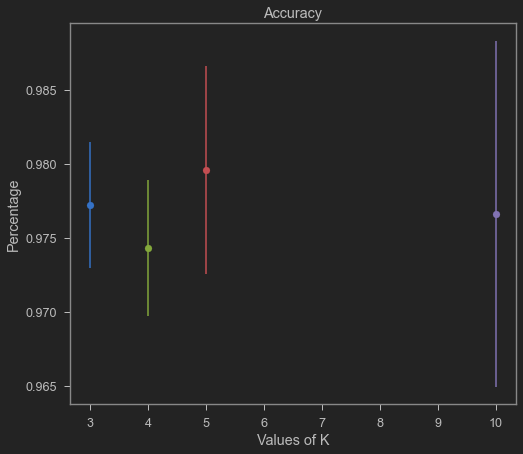

In [53]:
from sklearn.linear_model import LogisticRegression

fig, ax = plt.subplots()
ax.set_xlabel("Values of K")
ax.set_ylabel("Percentage")
ax.set_title("Accuracy")


for s in split_list:
    print("K = ", s)
    kf = KFold(n_splits=s, shuffle=True, random_state=RANDOM_STATE)


    for train_inx, test_inx in kf.split(X):
        # Split X and y on the index given by the KFold
        X_train, X_test = np.array(X)[train_inx], np.array(X)[test_inx]
        y_train, y_test = np.array(y)[train_inx], np.array(y)[test_inx]
        # Generate the text counts using the vectorizer
        train_features = vectorizer.fit_transform(X_train)
        test_features = vectorizer.transform(X_test)

        # Fit model to the training data
        lr= LogisticRegression()
        lr.fit(train_features,y_train)

    scores = cross_val_score(lr, test_features, y_test, cv=5)
    avg = scores.mean()
    std = scores.std()
    ax.scatter(s, avg)
    ax.errorbar(s, avg, yerr=std)
    print("Cross Validation Accuracy: : %0.2f ( +/- %0.2f)" % (avg, std * 2))
plt.show()

In [54]:
#print(metrics.accuracy_score(y_test.reshape(-1,1), lr.predict(test_features)))
print("confusion matrix:\n",metrics.confusion_matrix(y_test.reshape(-1,1), lr.predict(test_features)))
print("\nclassification report: ",metrics.classification_report(y_test.reshape(-1,1), lr.predict(test_features)) )

confusion matrix:
 [[  0   4]
 [  0 167]]

classification report:                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.98      1.00      0.99       167

    accuracy                           0.98       171
   macro avg       0.49      0.50      0.49       171
weighted avg       0.95      0.98      0.97       171



C:\Users\pasxo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print("roc auc score: ",metrics.roc_auc_score(y_test.reshape(-1,1), lr.predict(test_features)))
print("lof loss: ",metrics.log_loss(y_test.reshape(-1,1), lr.predict(test_features)))

roc auc score:  0.5
lof loss:  0.8079432980664543


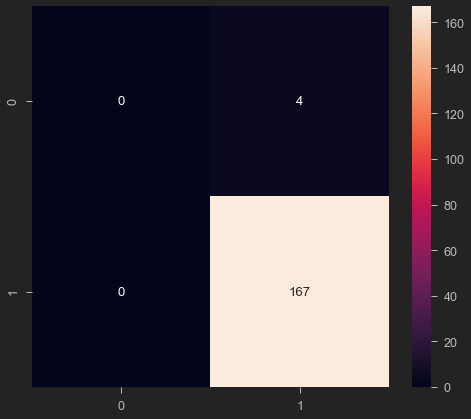

In [56]:
logistic_confusionmatrix=metrics.confusion_matrix(y_test.reshape(-1,1), lr.predict(test_features))
sns.heatmap(logistic_confusionmatrix,annot=True,fmt='d')
plt.show()

## Model 2 - SVC

K =  3
Cross Validation Accuracy: : 0.98 ( +/- 0.02)
K =  4
Cross Validation Accuracy: : 0.97 ( +/- 0.02)
K =  5
Cross Validation Accuracy: : 0.98 ( +/- 0.01)
K =  10
Cross Validation Accuracy: : 0.98 ( +/- 0.02)


C:\Users\pasxo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


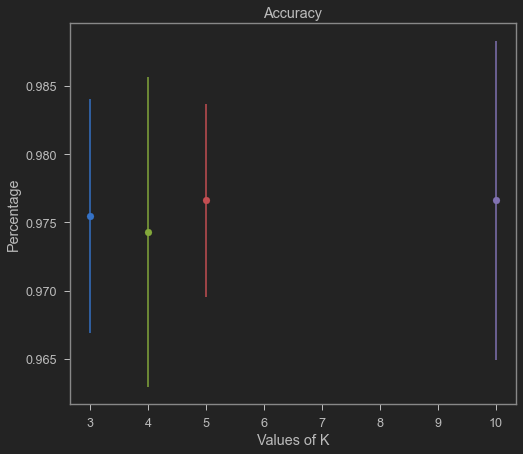

In [57]:
from sklearn.svm import LinearSVC
fig, ax = plt.subplots()
ax.set_xlabel("Values of K")
ax.set_ylabel("Percentage")
ax.set_title("Accuracy")


for s in split_list:
    print("K = ", s)
    kf = KFold(n_splits=s, shuffle=True, random_state=RANDOM_STATE)


    for train_inx, test_inx in kf.split(X):
        # Split X and y on the index given by the KFold
        X_train, X_test = np.array(X)[train_inx], np.array(X)[test_inx]
        y_train, y_test = np.array(y)[train_inx], np.array(y)[test_inx]
        # Generate the text counts using the vectorizer
        train_features = vectorizer.fit_transform(X_train)
        test_features = vectorizer.transform(X_test)
        # Fit model to the training data
        svc=LinearSVC()
        svc.fit(train_features,y_train)

    scores = cross_val_score(svc, test_features, y_test, cv=5)
    avg = scores.mean()
    std = scores.std()
    ax.scatter(s, avg)
    ax.errorbar(s, avg, yerr=std)
    print("Cross Validation Accuracy: : %0.2f ( +/- %0.2f)" % (avg, std * 2))
plt.show()

In [58]:
#print(metrics.accuracy_score(y_test.reshape(-1,1), svc.predict(test_features)))
linearSvm_confusion_matrix= metrics.confusion_matrix(y_test.reshape(-1,1), svc.predict(test_features))
print("classification report: ",metrics.classification_report(y_test.reshape(-1,1), svc.predict(test_features)))

classification report:                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.98      0.99      0.98       167

    accuracy                           0.96       171
   macro avg       0.49      0.49      0.49       171
weighted avg       0.95      0.96      0.96       171



In [59]:
print("roc auc score: ",metrics.roc_auc_score(y_test.reshape(-1,1), svc.predict(test_features)))
print("log loss: ",metrics.log_loss(y_test.reshape(-1,1), svc.predict(test_features)))

roc auc score:  0.4940119760479042
log loss:  1.2119055950829536


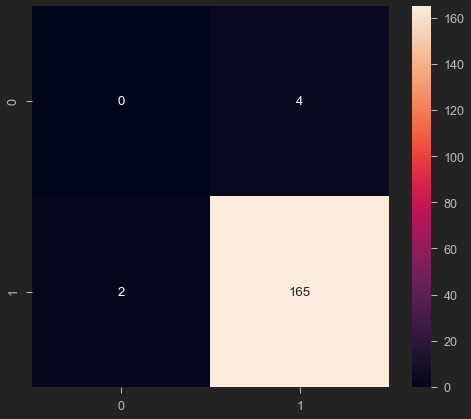

In [60]:
sns.heatmap(linearSvm_confusion_matrix,annot=True,fmt='d')
plt.show()

## Model 3 - Decision Tree Classifier

K =  3
Cross Validation Accuracy: : 0.97 ( +/- 0.01)
K =  4
Cross Validation Accuracy: : 0.96 ( +/- 0.02)
K =  5
Cross Validation Accuracy: : 0.97 ( +/- 0.03)
K =  10
Cross Validation Accuracy: : 0.97 ( +/- 0.04)


C:\Users\pasxo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


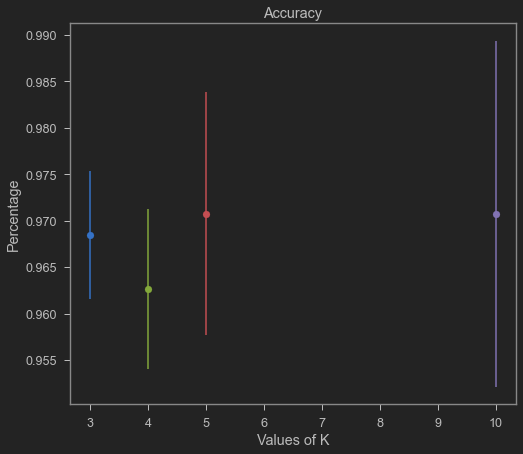

In [61]:
from sklearn.tree import DecisionTreeClassifier

fig, ax = plt.subplots()
ax.set_xlabel("Values of K")
ax.set_ylabel("Percentage")
ax.set_title("Accuracy")

for s in split_list:
    print("K = ", s)
    kf = KFold(n_splits=s, shuffle=True, random_state=RANDOM_STATE)


    for train_inx, test_inx in kf.split(X):
        # Split X and y on the index given by the KFold
        X_train, X_test = np.array(X)[train_inx], np.array(X)[test_inx]
        y_train, y_test = np.array(y)[train_inx], np.array(y)[test_inx]
        # Generate the text counts using the vectorizer
        train_features = vectorizer.fit_transform(X_train)
        test_features = vectorizer.transform(X_test)
        # Fit model to the training data
        dtc = DecisionTreeClassifier()
        dtc.fit(train_features,y_train)

    scores = cross_val_score(dtc, test_features, y_test, cv=5)
    avg = scores.mean()
    std = scores.std()
    ax.scatter(s, avg)
    ax.errorbar(s, avg, yerr=std)
    print("Cross Validation Accuracy: : %0.2f ( +/- %0.2f)" % (avg, std * 2))
plt.show()

In [62]:
#print (metrics.accuracy_score(y_test.reshape(-1,1), dtc.predict(test_features)))
dtc_confusion_matrix = metrics.confusion_matrix(y_test.reshape(-1,1), dtc.predict(test_features))
print("classification report: ",metrics.classification_report(y_test.reshape(-1,1), dtc.predict(test_features)))

classification report:                precision    recall  f1-score   support

         0.0       0.50      0.25      0.33         4
         1.0       0.98      0.99      0.99       167

    accuracy                           0.98       171
   macro avg       0.74      0.62      0.66       171
weighted avg       0.97      0.98      0.97       171



In [63]:
print ("roc auc score: ",metrics.roc_auc_score(y_test.reshape(-1,1), dtc.predict(test_features)))
print ("log loss: ",metrics.log_loss(y_test.reshape(-1,1), dtc.predict(test_features)))

roc auc score:  0.6220059880239521
log loss:  0.8079386220580906


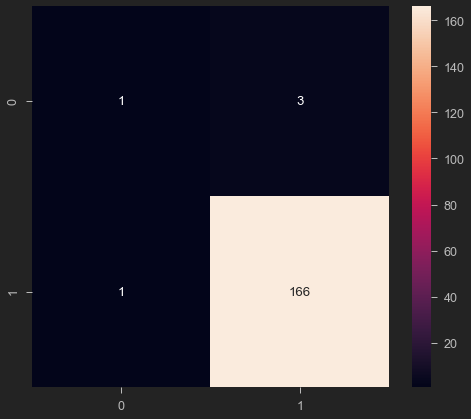

In [64]:
sns.heatmap(dtc_confusion_matrix,annot=True,fmt='d')
plt.show()

## Model 4 - Random Forest Classifier

K =  3
Cross Validation Accuracy: : 0.98 ( +/- 0.01)
K =  4
Cross Validation Accuracy: : 0.97 ( +/- 0.02)
K =  5
Cross Validation Accuracy: : 0.98 ( +/- 0.01)
K =  10


C:\Users\pasxo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Accuracy: : 0.98 ( +/- 0.02)


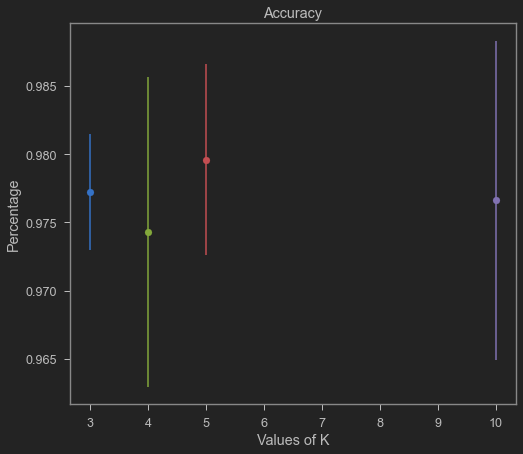

In [65]:
from sklearn.ensemble import RandomForestClassifier
fig, ax = plt.subplots()
ax.set_xlabel("Values of K")
ax.set_ylabel("Percentage")
ax.set_title("Accuracy")

for s in split_list:
    print("K = ", s)
    kf = KFold(n_splits=s, shuffle=True, random_state=RANDOM_STATE)


    for train_inx, test_inx in kf.split(X):
        # Split X and y on the index given by the KFold
        X_train, X_test = np.array(X)[train_inx], np.array(X)[test_inx]
        y_train, y_test = np.array(y)[train_inx], np.array(y)[test_inx]
        # Generate the text counts using the vectorizer
        train_features = vectorizer.fit_transform(X_train)
        test_features = vectorizer.transform(X_test)
        # Fit model to the training data
        rfc = RandomForestClassifier()
        rfc.fit(train_features,y_train)

    scores = cross_val_score(rfc, test_features, y_test, cv=5)
    avg = scores.mean()
    std = scores.std()
    ax.scatter(s, avg)
    ax.errorbar(s, avg, yerr=std)
    print("Cross Validation Accuracy: : %0.2f ( +/- %0.2f)" % (avg, std * 2))
plt.show()

In [66]:
#print (metrics.accuracy_score(y_test.reshape(-1,1), rfc.predict(test_features)))
rfc_confusion_matrix = metrics.confusion_matrix(y_test.reshape(-1,1), rfc.predict(test_features))
print("classification report: ",metrics.classification_report(y_test.reshape(-1,1), rfc.predict(test_features)))

classification report:                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.98      1.00      0.99       167

    accuracy                           0.98       171
   macro avg       0.49      0.50      0.49       171
weighted avg       0.95      0.98      0.97       171



C:\Users\pasxo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
print("roc auc: ",metrics.roc_auc_score(y_test.reshape(-1,1), rfc.predict(test_features)))
print("log loss: ",metrics.log_loss(y_test.reshape(-1,1), rfc.predict(test_features)))

roc auc:  0.5
log loss:  0.8079432980664543


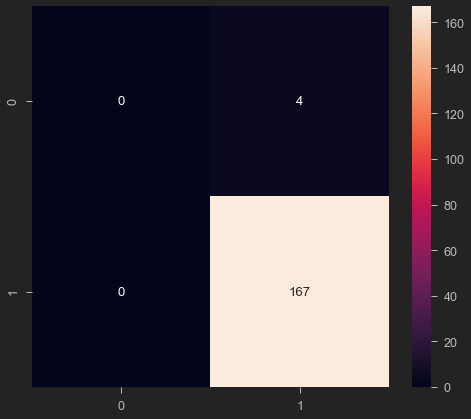

In [68]:
sns.heatmap(rfc_confusion_matrix,annot=True,fmt='d')
plt.show()

## Model 5 - K Neighbors

K =  3
Cross Validation Accuracy: : 0.98 ( +/- 0.01)
K =  4
Cross Validation Accuracy: : 0.97 ( +/- 0.01)
K =  5
Cross Validation Accuracy: : 0.98 ( +/- 0.01)
K =  10
Cross Validation Accuracy: : 0.98 ( +/- 0.02)


C:\Users\pasxo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


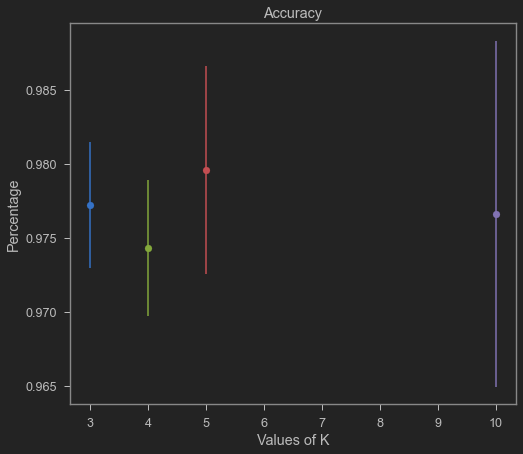

In [69]:
from sklearn.neighbors import KNeighborsClassifier

fig, ax = plt.subplots()
ax.set_xlabel("Values of K")
ax.set_ylabel("Percentage")
ax.set_title("Accuracy")

for s in split_list:
    print("K = ", s)
    kf = KFold(n_splits=s, shuffle=True, random_state=RANDOM_STATE)


    for train_inx, test_inx in kf.split(X):
        # Split X and y on the index given by the KFold
        X_train, X_test = np.array(X)[train_inx], np.array(X)[test_inx]
        y_train, y_test = np.array(y)[train_inx], np.array(y)[test_inx]
        # Generate the text counts using the vectorizer
        train_features = vectorizer.fit_transform(X_train)
        test_features = vectorizer.transform(X_test)
        # Fit model to the training data
        knc = KNeighborsClassifier()
        knc.fit(train_features,y_train)

    scores = cross_val_score(knc, test_features, y_test, cv=5)
    avg = scores.mean()
    std = scores.std()
    ax.scatter(s, avg)
    ax.errorbar(s, avg, yerr=std)
    print("Cross Validation Accuracy: : %0.2f ( +/- %0.2f)" % (avg, std * 2))
plt.show()

In [70]:
#print(metrics.accuracy_score(y_test.reshape(-1,1), knc.predict(test_features)))
knc_confusion_matrix = metrics.confusion_matrix(y_test.reshape(-1,1), knc.predict(test_features))
print("classification report: ",metrics.classification_report(y_test.reshape(-1,1), knc.predict(test_features)))

classification report:                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.98      1.00      0.99       167

    accuracy                           0.98       171
   macro avg       0.49      0.50      0.49       171
weighted avg       0.95      0.98      0.97       171



C:\Users\pasxo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
print("roc auc score: ",metrics.roc_auc_score(y_test.reshape(-1,1), knc.predict(test_features)))
print("log loss: ",metrics.log_loss(y_test.reshape(-1,1), knc.predict(test_features)))

roc auc score:  0.5
log loss:  0.8079432980664543


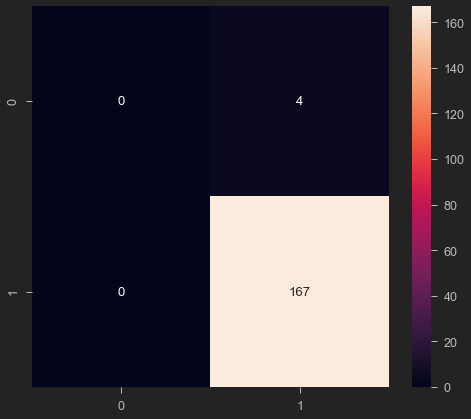

In [72]:
sns.heatmap(knc_confusion_matrix,annot=True,fmt='d')
plt.show()

## Model 6 - GaussianNB 

K =  3
Cross Validation Accuracy: : 0.85 ( +/- 0.24)
K =  4
Cross Validation Accuracy: : 0.86 ( +/- 0.22)
K =  5
Cross Validation Accuracy: : 0.84 ( +/- 0.24)
K =  10
Cross Validation Accuracy: : 0.81 ( +/- 0.33)


C:\Users\pasxo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


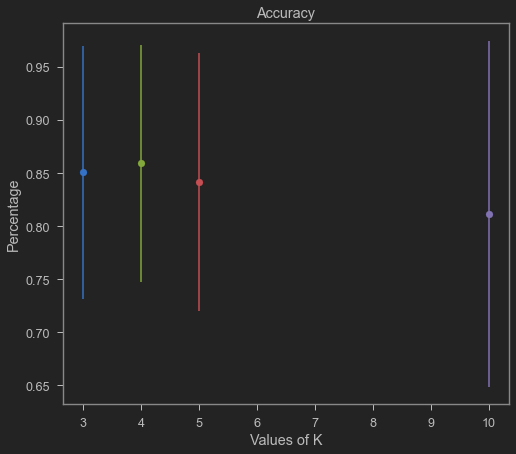

In [73]:
from sklearn.naive_bayes import GaussianNB

fig, ax = plt.subplots()
ax.set_xlabel("Values of K")
ax.set_ylabel("Percentage")
ax.set_title("Accuracy")

for s in split_list:
    print("K = ", s)
    kf = KFold(n_splits=s, shuffle=True, random_state=RANDOM_STATE)


    for train_inx, test_inx in kf.split(X):
        # Split X and y on the index given by the KFold
        X_train, X_test = np.array(X)[train_inx], np.array(X)[test_inx]
        y_train, y_test = np.array(y)[train_inx], np.array(y)[test_inx]
        # Generate the text counts using the vectorizer
        train_features = vectorizer.fit_transform(X_train)
        test_features = vectorizer.transform(X_test)
        # Fit model to the training data
        gnb = GaussianNB()
        gnb.fit(train_features.todense(),y_train)

    scores = cross_val_score(gnb, test_features.todense(), y_test, cv=5)
    avg = scores.mean()
    std = scores.std()
    ax.scatter(s, avg)
    ax.errorbar(s, avg, yerr=std)
    print("Cross Validation Accuracy: : %0.2f ( +/- %0.2f)" % (avg, std * 2))
plt.show()

In [74]:
#print("accuracy score: ",metrics.accuracy_score(y_test.reshape(-1,1), gnb.predict(test_features.todense())))
gnb_confusion_matrix = metrics.confusion_matrix(y_test.reshape(-1,1), gnb.predict(test_features.todense()))
print("\nclassification report: ", metrics.classification_report(y_test.reshape(-1,1), gnb.predict(test_features.todense())))


classification report:                precision    recall  f1-score   support

         0.0       0.03      0.25      0.06         4
         1.0       0.98      0.81      0.89       167

    accuracy                           0.80       171
   macro avg       0.50      0.53      0.47       171
weighted avg       0.96      0.80      0.87       171



In [75]:
print("roc auc score: ", metrics.roc_auc_score(y_test.reshape(-1,1), gnb.predict(test_features.todense())))
print("log loss: ", metrics.log_loss(y_test.reshape(-1,1), gnb.predict(test_features.todense())))

roc auc score:  0.532185628742515
log loss:  6.8673730773055786


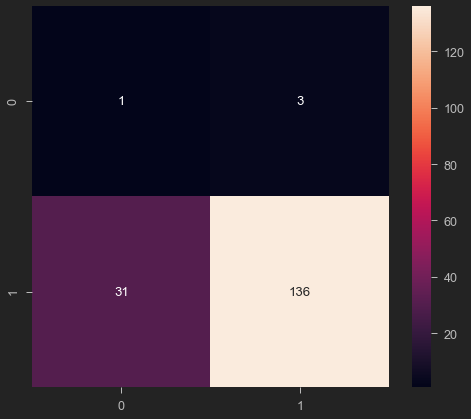

In [76]:
sns.heatmap(gnb_confusion_matrix,annot=True,fmt='d')
plt.show()